In [173]:
!pip install pandas
!pip install matplotlib

You should consider upgrading via the '/Users/michael/.pyenv/versions/3.9.1/envs/cs230/bin/python3.9 -m pip install --upgrade pip' command.
     |████████████████████████████████| 8.5 MB 152 kB/s eta 0:00:01     |██                              | 552 kB 2.4 MB/s eta 0:00:04     |█████████                       | 2.4 MB 2.4 MB/s eta 0:00:03
     |████████████████████████████████| 61 kB 641 kB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 2.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/michael/.pyenv/versions/3.9.1/envs/cs230/bin/python3.9 -m pip install --upgrade pip' command.


In [180]:
import pandas as pd
import matplotlib.pyplot as plt
from constants import STACKX_COLUMNS


In [169]:
def calculate_agreement(data: pd.DataFrame, col: str) -> dict:
    # Calculate how many of the labels agree with the rest of the group
    data = data[data['understandable'] == 1]
    data = data[data.duplicated(subset=['passage', 'question'],keep=False)]
    groups = data.groupby(by=['passage', 'question'])
    ret = {'agree': 0, 'disagree': 0, 'accuracy': 0}
    group_keys = list(groups.groups.keys())
    for key in group_keys:
        group = groups.get_group(key).reset_index(drop=True)
        for i in range(len(group)):
            subgroup = group.drop(index=i)
            subgroup_mean = round(subgroup.mean(axis=0)[col])
            holdout = group.iloc[i][col]
            if subgroup_mean == holdout:
                ret['agree'] += 1
            else:
                ret['disagree'] += 1
    ret['accuracy'] = ret['agree'] / (ret['agree'] + ret['disagree'])
    return ret

def calculate_agreement_binary(data: pd.DataFrame, col: str) -> dict:
    # Calculate how many of the binary labels agree with the rest of the group
    data = data[data['understandable'] == 1]
    data = data[data.duplicated(subset=['passage', 'question'],keep=False)]
    groups = data.groupby(by=['passage', 'question'])
    ret = {'agree': 0, 'disagree': 0, 'accuracy': 0}
    group_keys = list(groups.groups.keys())
    for key in group_keys:
        group = groups.get_group(key).reset_index(drop=True)
        for i in range(len(group)):
            subgroup = group.drop(index=i)
            subgroup_mean = round(subgroup.mean(axis=0)[col])
            subgroup_binary = subgroup_mean > 3
            holdout = group.iloc[i][col]
            holdout_binary = holdout > 3
            if subgroup_binary == holdout_binary:
                ret['agree'] += 1
            else:
                ret['disagree'] += 1
    ret['accuracy'] = ret['agree'] / (ret['agree'] + ret['disagree'])
    return ret

In [175]:
data = pd.read_csv('raw_datasets/labels_with_stackx.csv')
data = data.drop(columns=STACKX_COLUMNS)
data = data.drop(columns=['comprehension binary', 'interest binary'])


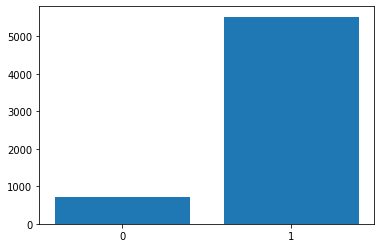

In [230]:
# Understandable
d = data['understandable'].value_counts().to_dict()

x = list(d.keys())
y = list(d.values())
y_text = [str(elem) for elem in y]


_ = plt.bar(x, y, align='center', tick_label=x)



{4: 2420, 2: 1698, 3: 797, 1: 299, 5: 296}


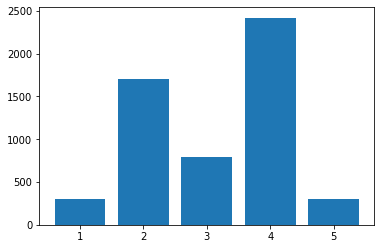

In [234]:
# Comprehension
d = data['comprehension'].value_counts().to_dict()

del d[0]

x = list(d.keys())
y = list(d.values())
y_text = [str(elem) for elem in y]


_ = plt.bar(x, y, align='center', tick_label=x)
print(d)

{4: 3573, 5: 807, 3: 654, 2: 402, 1: 62}


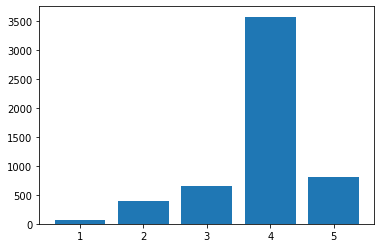

In [235]:
# Comprehension
d = data['interest'].value_counts().to_dict()

del d[0]

x = list(d.keys())
y = list(d.values())
y_text = [str(elem) for elem in y]


_ = plt.bar(x, y, align='center', tick_label=x)
print(d)


In [171]:
print(f"Interest on 1-5 scale: {calculate_agreement(data, 'interest')}")
print(f"Comprehension on 1-5 scale: {calculate_agreement(data, 'comprehension')}")
print(f"Interest on binary scale: {calculate_agreement_binary(data, 'interest')}")
print(f"Comprehension on binary scale: {calculate_agreement_binary(data, 'comprehension')}")

Interest on 1-5 scale: {'agree': 491, 'disagree': 477, 'accuracy': 0.5072314049586777}
Comprehension on 1-5 scale: {'agree': 258, 'disagree': 710, 'accuracy': 0.2665289256198347}
Interest on binary scale: {'agree': 655, 'disagree': 105, 'accuracy': 0.8618421052631579}
Comprehension on binary scale: {'agree': 289, 'disagree': 232, 'accuracy': 0.5547024952015355}


Agree Binary: 686 | Disagree Binary: 282
Accuracy: 0.7086776859504132
